In [16]:
import tensorflow as tf
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import cv2
import sklearn

import os
import matplotlib.pyplot as plt



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import cv2
import sklearn

import os
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

In [14]:
def load_dataset(dataset_path, img_size=(128, 128)):
    images, labels = [], []
    blood_groups = ['A-', 'B-', 'AB-', 'O-','B+','A+','O+','AB+']
    
    for label, blood_group in enumerate(blood_groups):
        blood_group_dir = os.path.join(dataset_path, blood_group)
        for img_name in os.listdir(blood_group_dir):
            img_path = os.path.join(blood_group_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)

    images = np.array(images).reshape(-1, img_size[0], img_size[1], 1) / 255.0  # Normalize images
    labels = np.array(labels)
    return images, labels

dataset_path = r"C:\Users\muni karthik\Desktop\blood group\blood_group_train"

images, labels = load_dataset(dataset_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\muni karthik\\Desktop\\blood group\\blood_group_train/A-'

In [31]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [32]:
data_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
data_gen.fit(X_train)


In [58]:
def build_cnn_model(input_shape):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten and Dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # To avoid overfitting
    model.add(Dense(64, activation='relu'))
    model.add(Dense(8, activation='softmax'))  # 8 classes (update accordingly if needed)
   
    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Building the model
cnn_model = build_cnn_model((128, 128, 1))

# Class weights dictionary for 8 classes
class_weights = {0: 545, 1: 970, 2: 698, 3: 750, 4: 630, 5: 720, 6: 840, 7: 700}

# Fitting the model (add your actual data to X_train, y_train, etc.)
history = cnn_model.fit(
    X_train,  # Add your training data here
    y_train,  # Add your training labels here
    validation_data=(X_test, y_test),  # Add your test data here
    batch_size=32,  # Batch size (you can adjust this)
    epochs=15,  # Number of epochs to train
    class_weight=class_weights  # Apply class weights to handle imbalance
)

# Model summary
cnn_model.summary()


Epoch 1/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - accuracy: 0.2455 - loss: 1277.3467 - val_accuracy: 0.6972 - val_loss: 0.8043
Epoch 2/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.6842 - loss: 590.4000 - val_accuracy: 0.8505 - val_loss: 0.4275
Epoch 3/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.7696 - loss: 440.1601 - val_accuracy: 0.8611 - val_loss: 0.3901
Epoch 4/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 114ms/step - accuracy: 0.7876 - loss: 401.1573 - val_accuracy: 0.8814 - val_loss: 0.3053
Epoch 5/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 114ms/step - accuracy: 0.8336 - loss: 338.5277 - val_accuracy: 0.8824 - val_loss: 0.3065
Epoch 6/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.8420 - loss: 307.8929 - val_accuracy: 0.8872 - val_loss: 0.2768
Epoch 7/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.8185 - loss: 335.5896 - val_accuracy: 0.8785 - val_loss: 0.3555
Epoch 8/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 114ms/step - accuracy: 0

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,938,522 (37.91 MB)

 Trainable params: 3,312,840 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,625,682 (25.27 MB)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,312,840 (12.64 MB)

 Trainable params: 3,312,840 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# print("Unique labels in training set:", np.unique(y_train))
# print("Unique labels in test set:", np.unique(y_test))

Unique labels in training set: [0 1 2 3 4 5 6 7]
Unique labels in test set: [0 1 2 3 4 5 6 7]


In [60]:
# import numpy as np

# def map_labels(labels, mapping):
#     return np.array([mapping[label] for label in labels])

# # Define the mapping based on your label distribution
# label_mapping = {
#     0: 0,  # Assuming 0 -> A
#     1: 1,  # Assuming 1 -> B
#     2: 2,  # Assuming 2 -> AB
#     3: 3,  # Assuming 3 -> O
#     4:4,
#     5:5,
#     6:6,
#     7:7
# }

# # Apply the mapping
# y_train_mapped = map_labels(y_train, label_mapping)
# y_test_mapped = map_labels(y_test, label_mapping)


In [61]:
# def filter_labels(images, labels, valid_labels):
#     filtered_images = []
#     filtered_labels = []
    
#     for img, label in zip(images, labels):
#         if label in valid_labels:
#             filtered_images.append(img)
#             filtered_labels.append(label)
    
#     return np.array(filtered_images), np.array(filtered_labels)

# valid_labels = set(label_mapping.keys())  # {0, 1, 2, 3}
# X_train_filtered, y_train_filtered = filter_labels(X_train, y_train, valid_labels)
# X_test_filtered, y_test_filtered = filter_labels(X_test, y_test, valid_labels)


In [62]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def create_data_generator(images, labels, batch_size=32):
#     data_gen = ImageDataGenerator(rescale=1./255)
#     return data_gen.flow(images, labels, batch_size=batch_size)

# train_generator = create_data_generator(X_train_filtered, y_train_filtered)
# test_generator = create_data_generator(X_test_filtered, y_test_filtered)


In [63]:
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
# from tensorflow.keras.metrics import SparseCategoricalAccuracy

# # Compile the model
# cnn_model.compile(
#     optimizer=Adam(),  # You can use different optimizers like SGD, RMSprop, etc.
#     loss=SparseCategoricalCrossentropy(),  # Use SparseCategoricalCrossentropy if your labels are integers
#     metrics=[SparseCategoricalAccuracy()]  # Add metrics to monitor
# )


In [64]:
# class_weights = {0:545, 1: 970, 2: 698, 3: 750,4:630,5:720,6:840,7:700}
# cnn_model.fit(class_weight=class_weights)


In [65]:
# history = cnn_model.fit(
#     train_generator,
#     validation_data=test_generator,
#     epochs=60
# )


In [66]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=-1)
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
print(classification_report(y_test, y_pred, target_names=['A-', 'B-', 'AB-', 'O-','B+','A+','O+','AB+']))


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Accuracy: 91.22%
              precision    recall  f1-score   support

          A-       0.92      0.91      0.91       217
          B-       1.00      0.75      0.86         4
         AB-       0.92      0.91      0.91       151
          O-       0.85      0.94      0.89       130
          B+       0.95      0.97      0.96       125
          A+       0.99      0.82      0.90        99
          O+       0.89      0.92      0.91       176
         AB+       0.91      0.91      0.91       135

    accuracy                           0.91      1037
   macro avg       0.93      0.89      0.91      1037
weighted avg       0.91      0.91      0.91      1037



In [67]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9074 - loss: 0.2488
Test Accuracy: 91.22%


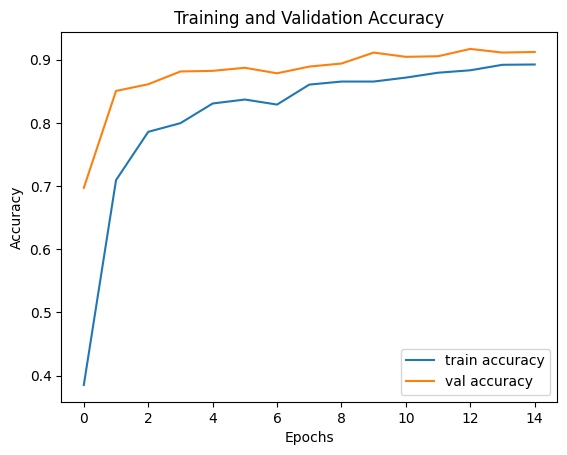

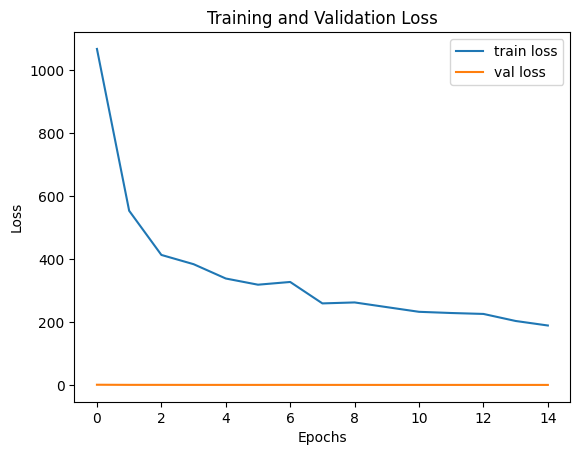

In [68]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [69]:
# Predict on the test set
y_pred = np.argmax(cnn_model.predict(X_test), axis=1)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Class A', 'Class B', 'Class AB', 'Class O', 'Other1', 'Other2', 'Other3', 'Other4']))


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
              precision    recall  f1-score   support

     Class A       0.92      0.91      0.91       217
     Class B       1.00      0.75      0.86         4
    Class AB       0.92      0.91      0.91       151
     Class O       0.85      0.94      0.89       130
      Other1       0.95      0.97      0.96       125
      Other2       0.99      0.82      0.90        99
      Other3       0.89      0.92      0.91       176
      Other4       0.91      0.91      0.91       135

    accuracy                           0.91      1037
   macro avg       0.93      0.89      0.91      1037
weighted avg       0.91      0.91      0.91      1037



In [71]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     --------------------------------------- 0.0/11.6 MB 640.0 kB/s eta 0:00:19
     --------------------------------------- 0.1/11.6 MB 787.7 kB/s eta 0:00:15
     ---------------------------------------- 0.1/11.6 MB 1.1 MB/s eta 0:00:11
      --------------------------------------- 0.2/11.6 MB 1.2 MB/s eta 0:00:10
     - -------------------------------------- 0.4/11.6 MB 1.6 MB/s eta 0:00:07
     - -------------------------------------- 0.4/11.6 MB 1.5 MB/s eta 0:00:08
     - -------------------------------------- 0.5/11.6 MB 1.5 MB/s eta 0:00:08
     - -------------------------------------- 0.6/11.6 MB 1.5 MB/s eta 0:00:08
     -- ------------------------------------- 0.6/11.6 MB 1.5 MB/s eta 0:00:08
     -- ------------------------------------- 0.7/11.6 MB 1.4 MB/s eta 0:00:08
     -- ------------------------------------- 0.7/11.6 MB 1.5 MB/s eta 0:00:08
 


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


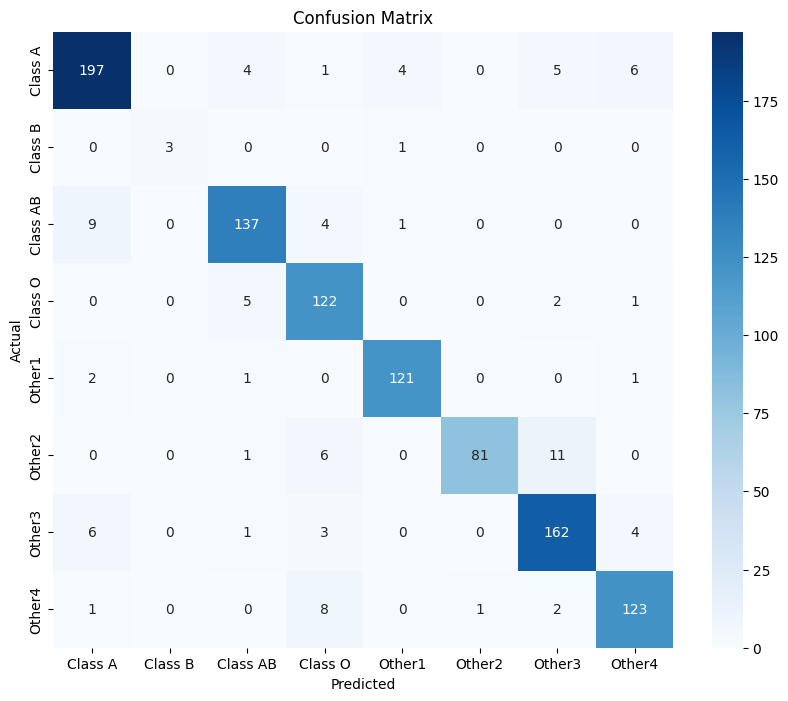

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class A', 'Class B', 'Class AB', 'Class O', 'Other1', 'Other2', 'Other3', 'Other4'], yticklabels=['Class A', 'Class B', 'Class AB', 'Class O', 'Other1', 'Other2', 'Other3', 'Other4'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [73]:
cnn_model.save('blood_group_classifier.h5')
